In [51]:
import datetime as dt
import yfinance as yf
import pandas as pd
import mplfinance as fplt

****Get the data from yahoofinance, this time i use Apple Inc as example, also create dataframe of 10 weeks and 40 weeks simple moving average,****

In [52]:
ticket_name='AAPL'

df = yf.download(ticket_name, start= dt.datetime(2000,1,1), end = dt.datetime(2023,4,1),interval='1wk')

df['SMA10'] = df['Close'].rolling(10).mean()

df['SMA40'] = df['Close'].rolling(40).mean()

df.dropna(inplace=True)

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA40
Date,,,,,,,,
2000-09-30 00:00:00-04:00,0.476563,0.477679,0.375000,0.396205,0.337217,7414596000,0.856334,0.952434
2000-10-07 00:00:00-04:00,0.404018,0.408482,0.341518,0.393973,0.335318,4925905600,0.811133,0.940074
2000-10-14 00:00:00-04:00,0.398438,0.415179,0.327009,0.348214,0.296371,4554149600,0.760798,0.926360
2000-10-21 00:00:00-04:00,0.361886,0.372768,0.312500,0.331473,0.282123,3486067200,0.704659,0.909800
2000-10-28 00:00:00-04:00,0.341518,0.410714,0.334821,0.397321,0.338167,3206952000,0.642941,0.897049
...,...,...,...,...,...,...,...,...
2023-02-18 00:00:00-05:00,150.199997,151.300003,145.720001,146.710007,146.710007,213742300,141.473997,147.284749
2023-02-25 00:00:00-05:00,147.710007,151.110001,143.899994,151.029999,151.029999,273931100,143.390997,147.319499
2023-03-04 00:00:00-05:00,153.789993,156.300003,147.610001,148.500000,148.500000,313302800,145.247998,147.397499


**print the SMA10 & 40 and plot the SMA10 & 40 chart**

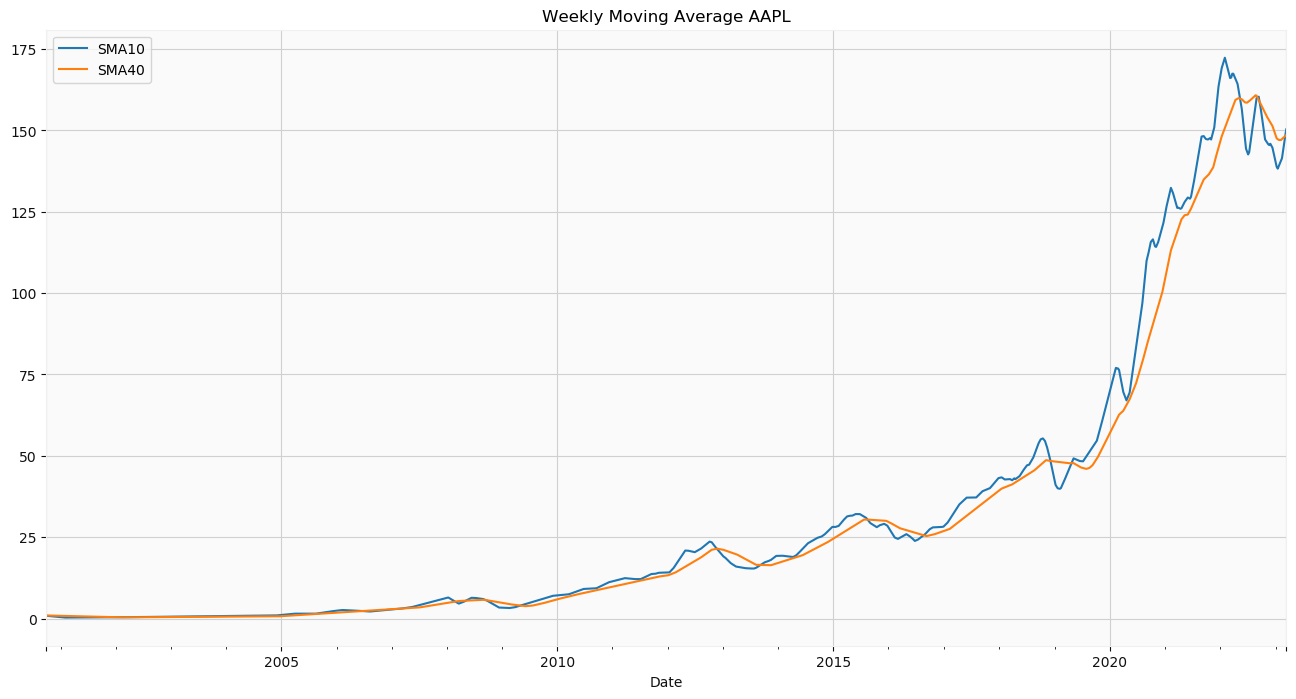

In [53]:
df[['SMA10', 'SMA40']].plot(label='reliance',figsize=(16, 8) , title = "Weekly Moving Average {0}".format(ticket_name))

**Draw the renko chart, this time i use monthly trend as indicator and 5% of the stock price as brick size (for indice such as HSI Daw Jones Nasdaq even Bitcoin i prefer 100points per brick)**

In [54]:
df = yf.download(ticket_name, start= dt.datetime(2000,1,1), end = dt.datetime(2023,4,1),interval='1mo')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01 00:00:00-05:00,0.936384,1.084821,0.772321,0.926339,0.788424,12555177600
2000-02-01 00:00:00-05:00,0.928571,1.070871,0.866071,1.023438,0.871067,7319782400
2000-03-01 00:00:00-05:00,1.058594,1.342634,1.017857,1.212612,1.032077,8698356800
2000-04-01 00:00:00-05:00,1.209821,1.245536,0.936384,1.107701,0.942785,8662404800
2000-05-01 00:00:00-04:00,1.114955,1.127232,0.729911,0.750000,0.638339,9807750400
...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,155.080002,155.449997,134.380005,148.029999,147.559540,1724847700
2022-12-01 00:00:00-05:00,148.210007,150.919998,125.870003,129.929993,129.731918,1675731200
2023-01-01 00:00:00-05:00,130.279999,147.229996,124.169998,144.289993,144.070023,1443652500


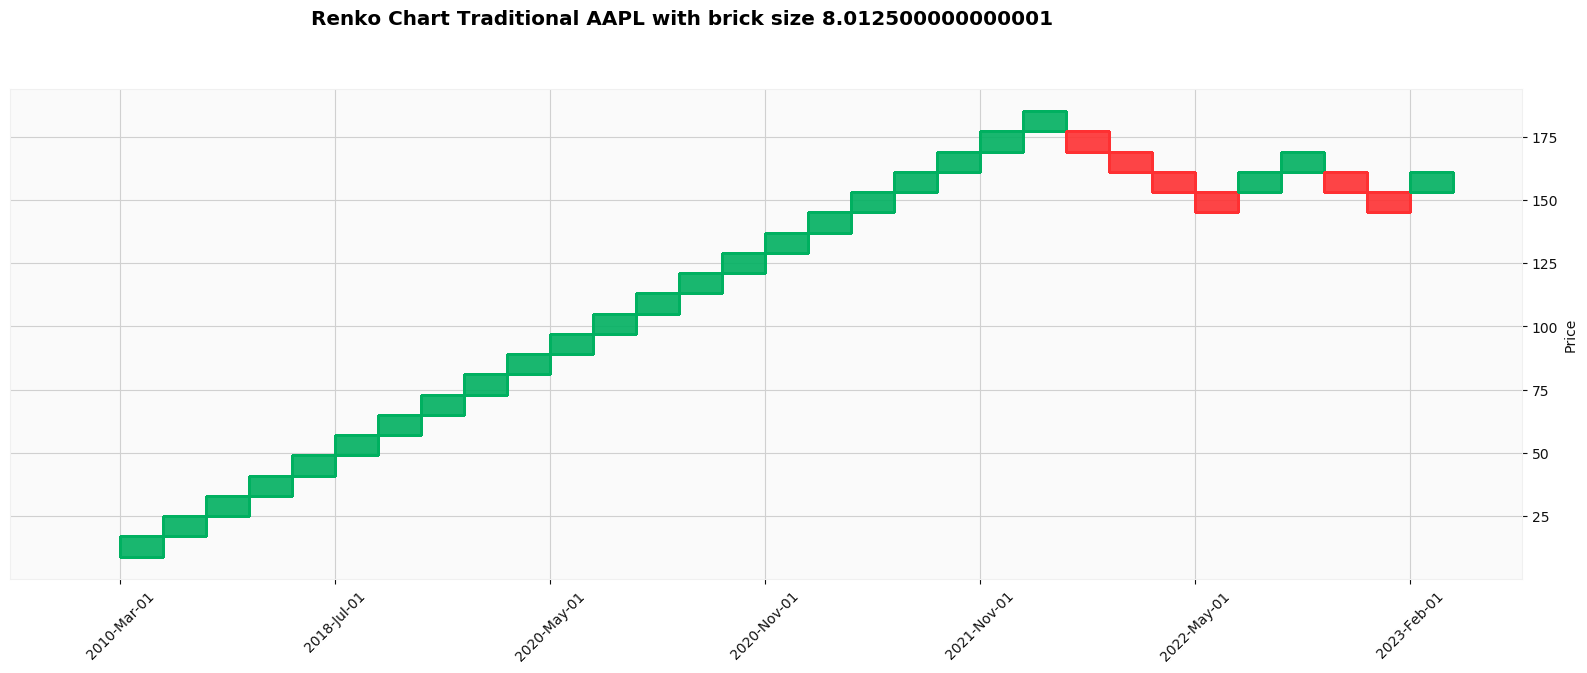

In [55]:
x=df['Adj Close'].iloc[-1]*0.05
fplt.plot(df,type='renko',renko_params=dict(brick_size=x),style='yahoo',figsize=(21,7), title="Renko Chart Traditional {0} with brick size {1}".format(ticket_name,x))

**first watch if 10 week sma is upon the 40 week sma to ensure its on the uptrend in long term, then if 1 green brick buy if 1 red brick sell**

In [ ]:
CBOE 